In [2]:
import os
import cv2
import numpy as np
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split #Separar dados de treino e teste
from sklearn.utils import shuffle #Embaralhar dados

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, roc_curve,classification_report, accuracy_score, confusion_matrix, auc


In [3]:
path = os.getcwd()+'/Aug/'
data_set = []
saidas = []
        
for caminho, d, file in os.walk(path):
    for filename in file:
        
        img = cv2.imread(os.path.join(caminho,filename))
        
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Deixa a imagem com tons de cinza
        #equalized_image = cv2.equalizeHist(gray) #Aumentar o contraste da imagem
        img = np.array(cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA))
        data_set.append(img.reshape(-1))
        
        if caminho == os.getcwd()+'/Aug/NewG0':
            saidas.append(0)
        elif caminho == os.getcwd()+'/Aug/NewG1':
            saidas.append(1)
        elif caminho == os.getcwd()+'/Aug/NewG2':
            saidas.append(2)
        elif caminho == os.getcwd()+'/Aug/NewG3':
            saidas.append(3)
        elif caminho == os.getcwd()+'/Aug/NewG4':
            saidas.append(4)

In [4]:
data_set[0]

array([102, 134, 199, ..., 113, 148, 216], dtype=uint8)

In [5]:
X = np.array(data_set)
y = np.array(saidas)

X = np.array(X) / 255.

X, y= shuffle(X, y) #embaralha os dados
#separa os dados em treino e teste com porcentagen de 80% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

In [6]:
clf = LogisticRegression(random_state=0,
                         solver='sag',
                         max_iter=1000)
clf.fit(X_train, y_train)

/home/erik/pterigio/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(max_iter=1000, random_state=0, solver='sag')

In [29]:
print(classification_report(y_train, clf.predict(X_train), labels=[1, 2, 3, 4]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       420
           2       1.00      1.00      1.00       959
           3       0.99      1.00      1.00      3526
           4       1.00      0.99      0.99      1902

   micro avg       1.00      1.00      1.00      6807
   macro avg       1.00      1.00      1.00      6807
weighted avg       1.00      1.00      1.00      6807



In [30]:
print(classification_report(y_test, clf.predict(X_test), labels=[0,1, 2, 3, 4]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       0.39      0.32      0.35       106
           2       0.34      0.29      0.32       234
           3       0.63      0.72      0.67       851
           4       0.46      0.39      0.42       495

    accuracy                           0.58      1847
   macro avg       0.56      0.55      0.55      1847
weighted avg       0.57      0.58      0.57      1847



In [20]:
#clf.predict(X_test[:2, :])

a = clf.predict_proba(X_test[25:26, :])
#clf.score(X_test, y_test)

In [21]:
for i in range(5):
    print(round(a[:,i][0]*100, 2))

0.0
0.0
1.25
97.69
1.06


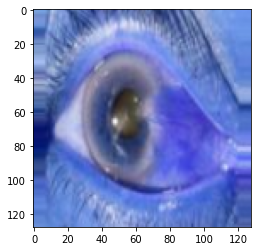

In [22]:
plt.imshow(X_test[30:31,:].reshape(128,128,3))

In [ ]:
http://neylsoncrepalde.github.io/2019-11-25-regressao_logistica_python/